In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords 
import re
import spacy
from collections import Counter
#from nltk import PorterStemmer
nltk.download('stopwords')
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models.coherencemodel import CoherenceModel
##Visualization on topic wise documents
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)
import gensim
from gensim import corpora

[nltk_data] Downloading package stopwords to C:\Users\Shilpa
[nltk_data]     Sujith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [3]:
# reading the data

data = pd.read_csv('C:\\Users\\Shilpa Sujith\\Desktop\\P40_G04_Dataset_Final.csv')

In [4]:
df=data.copy() # Creating a copy of the original data

In [5]:
medicine_name = input("Enter the medicine name : ")

Enter the medicine name : Bactrim


In [6]:
selected_medicine_df = df[df['Medicine Name']==medicine_name]

All the reviews have '\n' at the end. Let's remove it.

In [7]:
#selected_medicine_df['Reviews']=selected_medicine_df['Reviews'].apply(lambda x:x.strip('\n')) # To remove '\n' from every review

In [8]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [9]:
def sentiment_category(rating):
    if (rating >= 5.0):
        return "positive"
    else:
        return "negative"

In [10]:
def clean_text(text):
    #ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    #text_cleaned = re.sub(r'\d+', '', text_cleaned)
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(' '.join(tokens))
    lemmas = [token.lemma_ for token in doc]
    text_cleaned=" ".join(lemmas)
    #text_cleaned=" ".join([ps.stem(token) for token in tokens])
    return text_cleaned

In [11]:
def clean_text1(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    return text2.lower()

# remove whitespace from text 
def remove_whitespace(text): 
    return  " ".join(text.split()) 

def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result

In [12]:
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 

def text_lowercase(text): 
    return text.lower() 

In [13]:
#selected_medicine_df['cleaned_reviews']=selected_medicine_df['Reviews'].apply(lambda x:clean_text(x))

In [14]:
selected_medicine_df['review_category']= selected_medicine_df.apply(lambda x: sentiment_category(x['Ratings']), axis=1)
selected_medicine_df['Reviews']=selected_medicine_df['Reviews'].apply(lambda x:x.strip('\n')) 
selected_medicine_df['cleaned_reviews'] =selected_medicine_df['Reviews'].apply(clean_text)
selected_medicine_df['cleaned_reviews'] =selected_medicine_df['cleaned_reviews'].apply(clean_text1)
selected_medicine_df['cleaned_reviews'] =selected_medicine_df['cleaned_reviews'].apply(remove_numbers)
selected_medicine_df['cleaned_reviews'] =selected_medicine_df['cleaned_reviews'].apply(remove_whitespace)
selected_medicine_df['cleaned_reviews'].tolist()

['quick reduction symptom',
 'prescribed bactrim kidney infection take dose first dose begin feel lousy assumed side effect second dose almost kill stabilize enough move lose consciousness blood pressure wake later central line severely swollen body skin bright like severe sunburn spend week hospital blood pressure constantly plummet apparently severe allergy',
 'bactrim clear skin less week forget take come back cleared right away soon take twice',
 'many pron cosmetic product acne residue many home remedy prove effect lighten skin mark tomato lemon juice take ucfresh tomatoud make paste well tablespoon lemon juice apply paste face around minute rinse gently water minute pulp aloe vera pulp aloe vera minute drop lemon juice apply affected area face minute onion onion small piece grind piece separate juice residue',
 'broke blister face scalp chest ooze clear sticky fluid literally melt skin ooze everything counter homeopathic flesh infection would clear finally urgent care prescribed 

In [15]:
selected_medicine_df.head()

,Medicine Name,Condition,Reviews,Ratings,Date,Useful Count,review_category,cleaned_reviews
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,29-Sep-17,3,positive,quick reduction symptom
68,Bactrim,Kidney Infections,"""I was prescribed Bactrim for a kidney infection. I took two doses, 500 mgs each. After the firs...",1.0,06-Dec-17,0,negative,prescribed bactrim kidney infection take dose first dose begin feel lousy assumed side effect se...
1588,Bactrim,Acne,"""Bactrim cleared my skin up in less than a week. I did forget to take it for a few days and it d...",10.0,01-Aug-14,34,positive,bactrim clear skin less week forget take come back cleared right away soon take twice
1754,Bactrim,Acne,"""Many of us opt for cosmetics and other products to get rid of acne residues. There are many hom...",10.0,23-Nov-16,2,positive,many pron cosmetic product acne residue many home remedy prove effect lighten skin mark tomato l...
1803,Bactrim,Bacterial Skin Infection,"""I broke out in blisters on face, scalp, and chest. These were oozing a clear sticky fluid that ...",8.0,12-Feb-17,44,positive,broke blister face scalp chest ooze clear sticky fluid literally melt skin ooze everything count...


In [16]:
stop_words=stopwords.words('english')
add=['ive','tried','id','mg','else','took','quot quot','quot','decide','went','weeks','don ’','’ve','"m',"'ve","'m",'i ’','&quot'
             'I ’','’ t','feel','side','effects','anxiety','sure','next','december','july','june','decided','go','gone','much',
             'many','taken','many','done','first','last','shows','june','july','january','mgs','because','went','asap','however',
             'med','im','would','could','still','entire','put','one','day','month','within','whole','time','work','want','since',
             'tried','whole','using','use','every','night','taking','take','get','got','year','week','mirtazapine','mesalamine',
             'bactrim','start','put','away','second','august','little','march','make','january','august','november','october',
             'september','doctor','th','couldnt','april','friday','mgs','help','make','use','hill','stay','afganistan','s',
             'ptsd','wean','wall','claire','contrave','cyclafem ','zyclara','copper','amitriptyline','methadone','levora',
             'paroxetine','miconazole','belviq','seroquel','ambien','nuvigil','chantix','microgestin fe ','klonopin','actos',
             'ciprofloxacin','trazodone','enteragam','aripiprazole','cyclosporine','suprep bowel prep kit','movantik','lorcaserin',
             'oxybutynin','lurasidone','clonazepam','ciclopirox','sodium oxybate','lamotrigine','blisovi fe ','ivermectin',
             'duloxetine','nuvaring','escitalopram','tesamorelin','campral','gabapentin','levonorgestrel','aubra','plan b onestep',
             'ethinyl estradiol etonogestrel','microgestin fe  ','wellbutrin','benzoyl peroxide clindamycin','etonogestrel',
             'nitrofurantoin','ortho tricyclen lo','tamsulosin','tofacitinib','cryselle','amphetamine dextroamphetamine',
             'clindamycin','pramipexole','skyla','lastacaft','effexor xr','nifedipine','afrezza','zoloft','ziprasidone',
             'ethinyl estradiol norethindrone','sertraline','aluminum chloride hexahydrate','paragard','acetaminophen hydrocodone',
             'pregabalin','ethinyl estradiol levonorgestrel','ultram','phentermine','venlafaxine','buspar',
             'aviane','inderal','promethazine','tioconazole','orthovisc','implanon','marezine','minoxidil','humira',
             'insulin inhalation','rapid acting','day','days','guaifenesin pseudoephedrine','phentermine topiramate','pristiq',
             'month','months','year','years','phenazopyridine','clonidine','ethinyl estradiol norgestimate','nicoderm cq',
             'celecoxib','fluoxetine','topamax','depakote','riboflavin','lo loestrin fe','drospirenone estradiol','bupropion','bacitracin neomycin polymyxin b','yaz','jolessa',
             'oxycodone','nexplanon','brisdelle','beyaz','yasmin','nucynta er','prozac','kariva','liraglutide','sutent',
             'tramadol','tylenol with codeine #','magnesium citrate','depoprovera',
             'drospirenone ethinyl estradiol','safyral','desyrel','glyburide','aldesleukin','desvenlafaxine',
            'acamprosate','spironolactone','doxylamine pyridoxine','demerol','vyvanse','sovaldi','motrin ib','valacyclovir',
            'buprenorphine naloxone','metoprolol','montelukast','dextromethorphan','levitra','restoril','azathioprine',
            'adapalene benzoyl peroxide','linzess','levetiracetam','ziana','suboxone','tinidazole','diazepam','quetiapine',
            'acetaminophen butalbital caffeine','estradiol','propofol','propranolol','levofloxacin','vilazodone','accutane','nalbuphine',
            'lexapro','miralax','phenobarbital','trisprintec','metronidazole','imiquimod','caffeine','lisinopril','benzonatate',
            'ayr saline nasal','clarithromycin','enbrel','polyethylene glycol with electrolytes',
            'restasis','symbyax','tretinoin','gleevec','ropinirole','clomiphene','clotrimazole','topiramate','fluorouracil','genvoya','tessalon perles',
            'asenapine','adipexp','prenatal plus','keflex','vitamin d','flexeril','viibryd','lysteda',
            'omnicef','augmentin','pentasa','zofran','kapidex','serzone','hyoscyamine methenamine methylene blue phenyl salicylate',
            'diphenhydramine','minocycline','monistat day combination pack','pitocin','pyridostigmine','naprosyn','elocon',
            'pazopanib','denosumab','bisacodyl','paxil','methotrexate','sprintec','buprenex','apri',
            'benzoyl peroxide erythromycin','qsymia','lyrica','trintellix','oseltamivir','seasonique','niravam','celexa',
            'codeine guaifenesin','cefuroxime','ortho evra','xanax','ondansetron','dulaglutide','supartz','naproxen',
            'alesse','orlistat','methylprednisolone','cymbalta','aspirin carisoprodol','canagliflozin','nasonex','junel fe ',
            'kombiglyze xr','pegfilgrastim','azelaic acid','mirena','suvorexant','lysine','nexium','citalopram','drysol','corticotropin',
            'meclizine','cefdinir','methocarbamol','azithromycin','sinemet','esomeprazole','prednisone','fentanyl','pseudoephedrine',
            'risperidone','alpha proteinase inhibitor','junel fe  ','divalproex sodium','pravastatin','vardenafil','abilify','amlodipine',
            'carvedilol','xyzal','budeprion sr','rosuvastatin','victoza','percocet','trulicity','tranexamic acid','paxil cr','oxycontin',
            'chlordiazepoxide','olanzapine','doxycycline','cellcept','imodium ad','cobicistat elvitegravir emtricitabine tenofovir alafenamide',
            'chateal','rizatriptan','strattera','monistat day combination pack','cyclobenzaprine','ethinyl estradiol norelgestromin',
            'uptravi','eletriptan','isotretinoin','rosula','methyldopa','fetzima','linaclotide','arimidex','eszopiclone','mononessa',
             'norethindrone','medroxyprogesterone','synviscone','xulane','remeron','pamelor','orphenadrine','etanercept','bupropion naltrexone',
             'milnacipran','acetaminophen codeine','penicillin v potassium','varenicline','advair diskus','cialis','tadalafil','alprazolam',
     'desogestrel ethinyl estradiol','metformin','duofilm','sprycel','ella','sronyx','alcaftadine','sulfamethoxazole trimethoprim','levothyroxine','kineret',
     'naturethroid','cholestyramine','flector patch','prochlorperazine','zovia','toprolxl','perampanel','cozaar',
     'acetaminophen dexbrompheniramine pseudoephedrine',
     'androgel','avinza','ativan','atomoxetine','oxymorphone','saphris','mirabegron','pramoxine','alphagan p',
     "phillips' milk of magnesia",'eluxadoline','terbinafine','indomethacin','latuda','plan b','apremilast','norco','savella',
     'vivitrol','ortho cyclen','advair hfa','anastrozole','xarelto','metformin sitagliptin','belsomra','trinessa','prazosin',
     'dicyclomine','sodium hyaluronate','toradol','epiduo','kyleena','levsin sl','human papillomavirus vaccine',
     'lortab','dexmethylphenidate','catapres','harvoni','lansoprazole','carbidopa levodopa','hydrocodone','morphine','relistor',
     'bevacizumab','barium sulfate','azor','azelastine fluticasone','zoster vaccine live','diltiazem','triprevifem','dapsone',
     'bismuth subsalicylate','wellbutrin xl','carisoprodol','olopatadine','citric acid magnesium oxide sodium picosulfate',
     'relpax','dalfampridine','dilantin','leuprolide','cetirizine','macrobid','methylphenidate','nitroglycerin','ritalin',
     'exubera','hydroxychloroquine','loestrin fe','enskyce','stalevo','amerge','lorazepam','lubiprostone','simcor','avonex pen',
     'methadose','acetaminophen oxycodone','abacavir dolutegravir lamivudine',
    'sumatriptan','cambia','tizanidine','adderall','exalgo','guaifenesin','ketorolac','tegretol','vesicare','plavix',
     'vortioxetine','atorvastatin','dienogest estradiol','roflumilast','minastrin fe','diclofenac','opana','donnatal',
     'depakote er','donepezil','sofosbuvir','monistat ','zolpidem','horizant','brovana','dulcolax','tylenol pm','saxenda','sulfasalazine',
     'nicotine','reglan','seroquel xr','dulera','mibelas fe','naltrexone','portia','temazepam','clindamycin tretinoin',
     'meperidine','hydroxyzine','ethinyl estradiol norgestrel','dapagliflozin','myrbetriq','hysingla er','propafenone','lunesta','liletta','trimethoprim','ortho micronor',
     'prevacid','onabotulinumtoxina','aptensio xr','omeprazole','finasteride','rapaflo','duexis','tamiflu','rozerem',
     'synthroid','differin','doxepin','acetaminophen dichloralphenazone isometheptene mucate','crestor','narcan injection','sildenafil',
     'lipitor','macrodantin','intuniv','pantoprazole','keppra','keppra xr','acyclovir','ledipasvir sofosbuvir','metrocream',
     'copaxone','magnesium sulfate potassium sulfate sodium sulfate','armodafinil','fluconazole','tylenol',
     'larin fe','xiidra','levaquin','tacrolimus','luvox','lotrel','conjugated estrogens medroxyprogesterone',
     'nortriptyline','adderall xr','viberzi','evolocumab','triumeq','gabapentin enacarbil','glucophage',
     'soma','antipyrine benzocaine','liothyronine','docosanol','qtapp dm','valium','effexor','efavirenz',
     'chlorpheniramine hydrocodone pseudoephedrine','lutera','zoladex','keytruda','roxicodone','phenergan','buspirone','empagliflozin linagliptin','singulair',
     'viagra','rituxan', 'jublia', 'fluticasone vilanterol', 'fentanyl transdermal system', 'diclegis',
     'hydromet','zipsor', 'milk of magnesia', 'melatonin', 'moviprep', 'aczone',
     'lactulose','pioglitazone','desloratadine','entyvio','gefitinib','meloxicam','bronkaid','niacin','paliperidone',
     'drospirenone ethinyl estradiol levomefolate calcium','scopolamine','sterapred','amoxicillin clavulanate','pentosan polysulfate sodium',
    'hydromorphone','flurazepam','zutripro','fluticasone','vicodin','mirapex','mometasone','fioricet',
     'metoclopramide','milk thistle','lidocaine','metaxalone','glatiramer','tecfidera','benzocaine','ustekinumab',
     'mucinex','adalimumab','tiotropium','vascepa','lisdexamfetamine','naloxegol','ixekizumab','mirvaso',
     'estarylla','ortho tricyclen','ramipril','aranesp','zioptan','zohydro er','rifaximin','hyoscyamine',
     'zovirax cream','teriparatide','ammonium lactate halobetasol','atenolol','testosterone',
     'cobicistat elvitegravir emtricitabine tenofovir','ethinyl estradiol ethynodiol','embeda','duac','infliximab',
     'deplin','penciclovir','lupron depot','avelox','geodon','cogentin','mefenamic acid','pramosone','synalar ointment',
     'emsam','doryx','ranolazine', 'hylenex', 'cosentyx', 'medrox', 'cipro', 'oxcarbazepine', 'tapentadol', 'cytomel',
     'gildess fe ', 'terconazole', 'pneumococcal valent vaccine',
     'eflornithine', 'etodolac', 'rabeprazole', 'librax', 'hydrochlorothiazide', 'pradaxa', 'kava', 'focalin xr',
     'levlen', 'femara', 'migranal', 'gianvi', 'flonase', 'stendra', 'dilaudid', 'exenatide',
     'risperdal', 'teriflunomide', 'esterified estrogens methyltestosterone',
     'loratadine pseudoephedrine', 'azithromycin dose pack', 'pylera', 'protonix iv',
     'vraylar', 'adapalene', 'camrese', 'gavilyten', 'dimenhydrinate', 'microgestin ', 'midazolam',
     'moxifloxacin', 'multivitamin with minerals', 'amoxicillin', 'butrans', 'lamictal', 'clomid',
     'spiriva', 'requip', 'celebrex', 'nasacort allergy hr',
     'metformin saxagliptin', 'bunavail', 'soolantra', 'acetaminophen aspirin caffeine', 'halcion',
     'ramelteon','invokana','colesevelam','fulvestrant',
     'natalizumab','benicar','loseasonique','lifitegrast','hycodan','icosapent','azelastine','efinaconazole',
     'loratadine','rexulti','sanctura','clozapine','benadryl allergy','luminal','tolterodine','benadryl','insulin lispro',
     'albuterol','sucralfate','mydayis','fluocinolone','biotin','ocella','bromfed dm','losartan','lasix','itraconazole',
     'methylnaltrexone','cutivate', 'cyred', 'breo ellipta', 'limbrel', 'prilosec','talwin nx', 'concerta', 'praluent', 'tarceva', 'farxiga', 'halobetasol',
     'biaxin', 'kenalog', 'thyroid desiccated', 'naproxen sumatriptan', 'botox', 'guanfacine',
     'vimpat', 'fenofibrate', 'ezgas ii', 'intelence', 'chlorpheniramine hydrocodone', 'ertaczo','minipress',
     'amethyst', 'sensipar', 'lupron', 'furosemide', 'phendimetrazine', 'asacol','provigil', 'sulfacetamide sodium', 'zoledronic acid', 'claravis', 'cyanocobalamin',
     'aleve', 'alprostadil', 'flagyl', 'clopidogrel', 'gildess fe  ', 'astelin','atropine hyoscyamine phenobarbital scopolamine', 'aldactone', 'altabax',
     'seasonale', 'amlodipine olmesartan', 'invega', 'rituximab', 'delsym', 'selegiline', 'fastin',
     'larin fe ', 'amphetamine', 'buprenorphine', 'fleet enema', 'yuvafem', 'lodine', 'mgday',
     'kinda','walmart','ve','ssris','zaps','fesoterodine','xylometazoline','cyproheptadine',
     'benzoic acid salicylic acid','adalat cc','methylergonovine','vistaril','chlordiazepoxide clidinium','taytulla','zyrtec',
     'tysabri','hylan gf ','tussionex pennkinetic','jalyn','excedrin back & body','polyethylene glycol ','phosphorated carbohydrate solution',
     'lamisil','neupro','brimonidine timolol','supprelin la','miconazole zinc oxide',
    'zubsolv','aspirin butalbital caffeine','senna','denavir','dhe ','beclomethasone', 'neurontin', 'robaxin',
     'thorazine','bydureon','meridia','fiorinal','carbamazepine','multivitamin',' prenatal','nivolumab','hetlioz','crisaborole',
     'tazorac','lomotil','oxytrol','zaleplon','disulfiram','loestrin ','silodosin','fiorinal with codeine','elmiron','lithium',
     'levophed','remicade','gilenya','reclipsen','atripla','droperidol','trihexyphenidyl','estropipate','podofilox','symbicort',
     'xerac ac','maxaltmlt','fluticasone salmeterol', 'propulsid', 'aricept', 'nebivolol', 'simvastatin',
     'tradjenta', 'zomigzmt', 'colchicine', 'dasatinib', 'ventolin hfa', 'aciphex', 'imipramine', 'nodoz',
     'ciprofloxacin dexamethasone','tricor','elavil','snris','zombie','enoxaparin','lovastatin','&#039']                 
stop_words.extend(add)
stop_words.append(medicine_name)
stop_words.append(medicine_name.lower())
stop_words.append(medicine_name.upper())
stop_words.append(medicine_name.title())

In [17]:
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

In [18]:
selected_medicine_df['cleaned_reviews']=selected_medicine_df['Reviews'].apply(remove_stopwords)
selected_medicine_df['cleaned_reviews'].tolist()

['"Quick reduction symptoms"',
 '"I prescribed kidney infection. I two doses, 500 each. After dose, I began lousy. I assumed effect. The dose almost killed me. I ER, I stabilized enough move ICU. Before I lost consciousness, blood pressure 35/27. I woke 3 later central line, severely swollen body, skin bright red, like severe sunburn. I spent 3 hospital, blood pressure constantly plummeting. I apparently severe allergy."',
 '"Bactrim cleared skin less week. I forget come back, cleared right soon I twice again. "',
 '"Many us opt cosmetics products rid acne residues. There home remedies proven lightening skin marks. Tomato Lemon Juice: Take %u201Cfresh tomato%u201D paste. Mix well tablespoon lemon juice. Apply paste face around 20 minutes rinse gently water 20 minutes. Pulp Aloe Vera: Let pulp Aloe Vera dry 5 minutes sun. Add 6-8 drops lemon juice apply affected area face 15 minutes. Onions: Cut onion small pieces. Grind pieces separate juice residue.\r\n"',
 '"I broke blisters face, sc

In [19]:
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag
def nouns_adj(text):
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'VB' 
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

beedi=pd.DataFrame(selected_medicine_df.cleaned_reviews.apply(nouns_adj))
pole=beedi['cleaned_reviews'].tolist()
pole=str(pole)
#pole

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shilpa Sujith\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
positive_reviews=selected_medicine_df.loc[selected_medicine_df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews_df =  pd.DataFrame(positive_reviews)
positive_reviews_df.columns= ['Review']

In [21]:
negative_reviews=selected_medicine_df.loc[selected_medicine_df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
negative_reviews_df =  pd.DataFrame(negative_reviews)
negative_reviews_df.columns= ['Review']

In [22]:
def getMostCommon(reviews_list,topn=40):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [23]:
def plotMostCommonWords(reviews_list,topn=40,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

In [24]:
from nltk import bigrams
lines = map(str.split,pole.split(','))
red=[]
for line in lines:
    red.append(", ".join([" ".join(bi) for bi in bigrams(line)]))


In [25]:
blue=[]
for i in red:
    blue.append(i.split(','))


Text(0.5, 1.0, 'Distribution of Reviews Category')

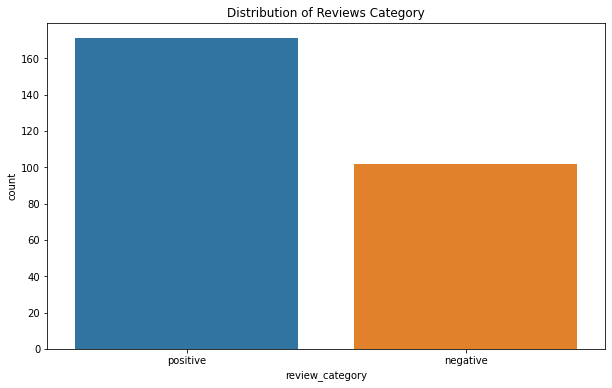

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(selected_medicine_df['review_category']).set_title("Distribution of Reviews Category")

In [27]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data1 = negative_reviews_df.Review.values.tolist()
data_words = list(sent_to_words(data1))
# remove stop words
data_words = remove_stopwords(data_words)


In [28]:
###Building LDA model
dictionary = corpora.Dictionary(blue)
corpus= [dictionary.doc2bow(rev) for rev in blue]

In [29]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus, id2word=dictionary, num_topics=2,chunksize=100, passes=45,iterations=150)

In [30]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=blue, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()


In [31]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.067051  0.0       1        1  51.102294
1     -0.067051  0.0       2        1  48.897706, topic_info=                     Term      Freq     Total Category  logprob  loglift
107         loss appetite  3.000000  3.000000  Default  30.0000  30.0000
13       kidney infection  2.000000  2.000000  Default  29.0000  29.0000
1804          none worked  2.000000  2.000000  Default  28.0000  28.0000
324     prescribed Keflex  2.000000  2.000000  Default  27.0000  27.0000
1435          sore throat  2.000000  2.000000  Default  26.0000  26.0000
...                   ...       ...       ...      ...      ...      ...
617          've reaction  1.699862  2.480655   Topic2  -7.3289   0.3375
470          acne cleared  1.695986  2.481448   Topic2  -7.3312   0.3349
1554            came home  1.596548  2.301951   Topic2  -7.3916   0.3495
741    experienced nausea  1.593301  2.302596   Topic2  -7.3936   0.3472
139    prescribed Bactrim  1.592746  2.810082   Topic2  -7.3940   0.1477

[109 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
4165      2  1.068882            % face
2128      1  0.653979            'm 've
3951      2  1.068787   'm experiencing
2134      1  0.653891          'm going
4088      2  1.068849          've pain
...     ...       ...               ...
3032      1  0.452949       treat tract
3032      2  0.452949       treat tract
1919      1  0.452850            way 'm
1919      2  0.452850            way 'm
4980      2  1.068895   yesterday today

[96 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [32]:
##What is the Dominant topic and its percentage contribution in each document
data=negative_reviews_df['Review'].tolist()
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list      
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                 wp = ldamodel.show_topic(topic_num)
                 topic_keywords = ", ".join([word for word, prop in wp])
                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
                    
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=blue)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
#df_dominant_topic
    
    
    
    

C:\Users\Shilpa Sujith\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
keywords =  set(df_dominant_topic['Keywords'])

C:\Users\Shilpa Sujith\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
keywords

C:\Users\Shilpa Sujith\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{" loss appetite,  tract infection,  ended hospital,  kidney infection,  started feeling,  stomach pain,  sore throat,  couldn rsquo,  've reaction,  acne cleared",
 " tract infection,  tract infections,  none worked,  prescribed Keflex,  medication 've,  neck face,  nausea vomiting,  emergency room,  stopped working,  way 'm"}

In [35]:
# Side Effects word cloud

C:\Users\Shilpa Sujith\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Shilpa Sujith\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


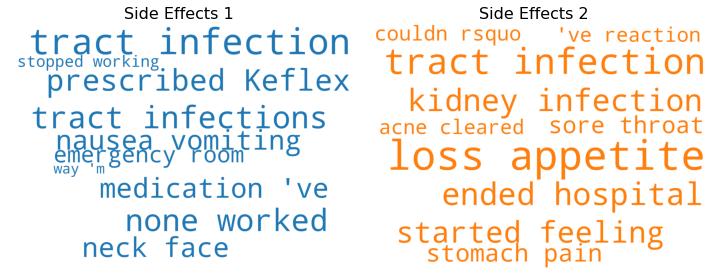

In [36]:

##Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=set(),
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Side Effects ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [37]:
# pickling the model 
#import pickle 
#pickle_out = open("drug_effects.pkl", "wb") 
#pickle.dump(lda_model, pickle_out) 
#pickle_out.close()

C:\Users\Shilpa Sujith\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
conditions =  list(set(selected_medicine_df['Condition']))
conditionDict = {} 
for x in conditions:
    np.where(selected_medicine_df[selected_medicine_df['Condition']==x])
    condition,reviews = x,selected_medicine_df[selected_medicine_df['Condition']==x]['review_category'].value_counts()
    conditionDict[condition] = reviews
df = pd.DataFrame(conditionDict)
df = df.T
df['Condition' ] = df.index
df = df.reset_index(drop=True)
df.fillna(0,inplace=True) 
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df['Effectiveness'] = round(df['positive']/(df['negative']+df['positive'])*100,2)
df.drop(['positive','negative'],inplace=True,axis=1)
df

C:\Users\Shilpa Sujith\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Condition,Effectiveness
0,Otitis Media,33.33
1,Bronchitis,60.00
2,Kidney Infections,55.56
3,Upper Respiratory Tract Infection,0.00
4,Urinary Tract Infection,47.52
5,Prevention of Bladder infection,66.67
6,3</span> users found this comment helpful.,0.00
7,Sinusitis,46.15
8,Bacterial Infection,44.44
9,Prostatitis,16.67
